In [1]:
import pandas as pd
import fsrs_optimizer

timezone = "Asia/Shanghai"
next_day_starts_at = 4
revlog_start_date = "2006-10-05"  # YYYY-MM-DD
filter_out_suspended_cards = False
filter_out_flags = []

In [2]:
optimizer = fsrs_optimizer.Optimizer()
optimizer.anki_extract(
    "./ALL__Archive.apkg", filter_out_suspended_cards, filter_out_flags
)
analysis = optimizer.create_time_series(timezone, revlog_start_date, next_day_starts_at)
print(analysis)
S0_dataset_group_1 = optimizer.S0_dataset_group.copy()
df1 = pd.read_csv(
    "revlog_history.tsv",
    sep="\t",
    index_col=None,
    dtype={"r_history": str, "t_history": str},
)
print(df1.shape)

Deck file extracted successfully!
revlog.csv saved.


  0%|          | 0/4879 [00:00<?, ?it/s]

Trainset saved.
Retention calculated.


  0%|          | 0/3833 [00:00<?, ?it/s]

Stability calculated.


analysis:   0%|          | 0/199 [00:00<?, ?it/s]

Analysis saved!
1:again, 2:hard, 3:good, 4:easy
    r_history  avg_interval  avg_retention  stability  factor  group_cnt
            1           1.0          0.898        1.2     inf        974
          1,3           3.0          0.913        3.7    3.08        762
        1,3,3           7.1          0.932       12.3    3.32        622
      1,3,3,3          16.3          0.881       14.5    1.18        463
    1,3,3,3,3          33.7          0.897       38.0    2.62        259
            3           1.0          0.969        4.1     inf       1920
          3,3           3.0          0.966       10.0    2.44       1689
        3,3,3           6.9          0.971       26.2    2.62       1529
      3,3,3,3          15.0          0.952       37.6    1.44       1246
    3,3,3,3,3          24.5          0.955       61.9    1.65        745
  3,3,3,3,3,3          40.3          0.931       81.3    1.31        490
3,3,3,3,3,3,3          70.9          0.958      239.7    2.95        252
   

In [3]:
optimizer = fsrs_optimizer.Optimizer()
optimizer.anki_extract(
    "./ALL__Learning.apkg", filter_out_suspended_cards, filter_out_flags
)
optimizer.create_time_series(
    timezone, revlog_start_date, next_day_starts_at, analysis=False
)
S0_dataset_group_2 = optimizer.S0_dataset_group.copy()
df2 = pd.read_csv(
    "revlog_history.tsv",
    sep="\t",
    index_col=None,
    dtype={"r_history": str, "t_history": str},
)
print(df2.shape)

Deck file extracted successfully!
revlog.csv saved.


  0%|          | 0/5459 [00:00<?, ?it/s]

Trainset saved.
(65224, 10)


In [4]:
optimizer.define_model()
optimizer.S0_dataset_group = S0_dataset_group_1
optimizer.pretrain(dataset=df1.copy(), verbose=False)
optimizer.train(verbose=False)
df1 = optimizer.dataset.copy()
w1 = optimizer.w

  0%|          | 0/28850 [00:00<?, ?it/s]

In [5]:
optimizer.define_model()
optimizer.S0_dataset_group = S0_dataset_group_2
optimizer.pretrain(df2.copy(), verbose=False)
optimizer.train(verbose=False)
df2 = optimizer.dataset.copy()
w2 = optimizer.w

  0%|          | 0/59765 [00:00<?, ?it/s]

In [6]:
optimizer.define_model()
optimizer.S0_dataset_group = pd.concat(
    [S0_dataset_group_1, S0_dataset_group_2])
optimizer.pretrain(pd.concat([df1, df2]), verbose=False)
optimizer.train(verbose=False)
df3 = optimizer.dataset.copy()
w3 = optimizer.w

  0%|          | 0/88615 [00:00<?, ?it/s]

In [7]:
print(w1, w2, w3, sep="\n")
print(df1.shape, df2.shape, df3.shape, sep="\n")

[1.1534, 1.1534, 4.0956, 10.8145, 5.2394, 1.4212, 1.2496, 0.019, 1.6314, 0.0771, 1.0825, 2.1494, 0.1069, 0.4765, 2.0493, 0.0, 3.3479]
[1.0495, 2.2809, 7.1618, 13.6196, 5.8118, 1.5981, 1.2567, 0.0013, 1.542, 0.1875, 0.9957, 2.5577, 0.0101, 0.3067, 0.7708, 0.0, 3.1378]
[1.0917, 1.1369, 5.6561, 11.7872, 5.3925, 1.5465, 1.2815, 0.0005, 1.5795, 0.1791, 0.9959, 2.6984, 0.014, 0.3057, 0.4334, 0.0, 3.2763]
(28850, 12)
(59765, 12)
(88615, 12)


log loss: 0.3002
RMSE(bins): 0.0217
R-squared: 0.9781
MAE: 0.0053
ICI: 0.0028
E50: 0.0023
E90: 0.0055
EMax: 0.1258
[0.02396351 0.97369673]

Last rating: 1
RMSE(bins): 0.0360
R-squared: 0.6676
MAE: 0.0194
ICI: 0.0179
E50: 0.0142
E90: 0.0281
EMax: 0.3797
[0.24380815 0.71568778]

Last rating: 2
RMSE(bins): 0.0625
R-squared: 0.6581
MAE: 0.0454
ICI: 0.0414
E50: 0.0445
E90: 0.0513
EMax: 0.0528
[-0.0368574   0.99427767]

Last rating: 3
RMSE(bins): 0.0258
R-squared: 0.9673
MAE: 0.0095
ICI: 0.0069
E50: 0.0077
E90: 0.0115
EMax: 0.0682
[0.01145539 0.99440006]

Last rating: 4
RMSE(bins): 0.0373
R-squared: 0.6680
MAE: 0.0090
ICI: 0.0083
E50: 0.0071
E90: 0.0125
EMax: 0.0344
[0.25017923 0.7411612 ]


({'R-squared': 0.9780930700982504,
  'MAE': 0.005297990569663568,
  'ICI': 0.002834368511199663,
  'rmse': 0.021660696341563316},
 (<Figure size 640x480 with 2 Axes>,
  <Figure size 1600x1200 with 8 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>))

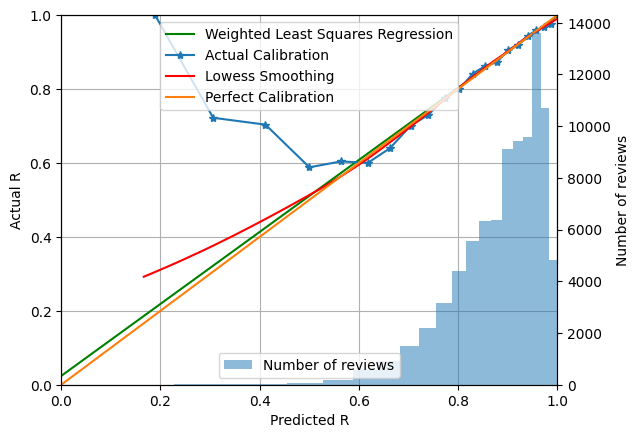

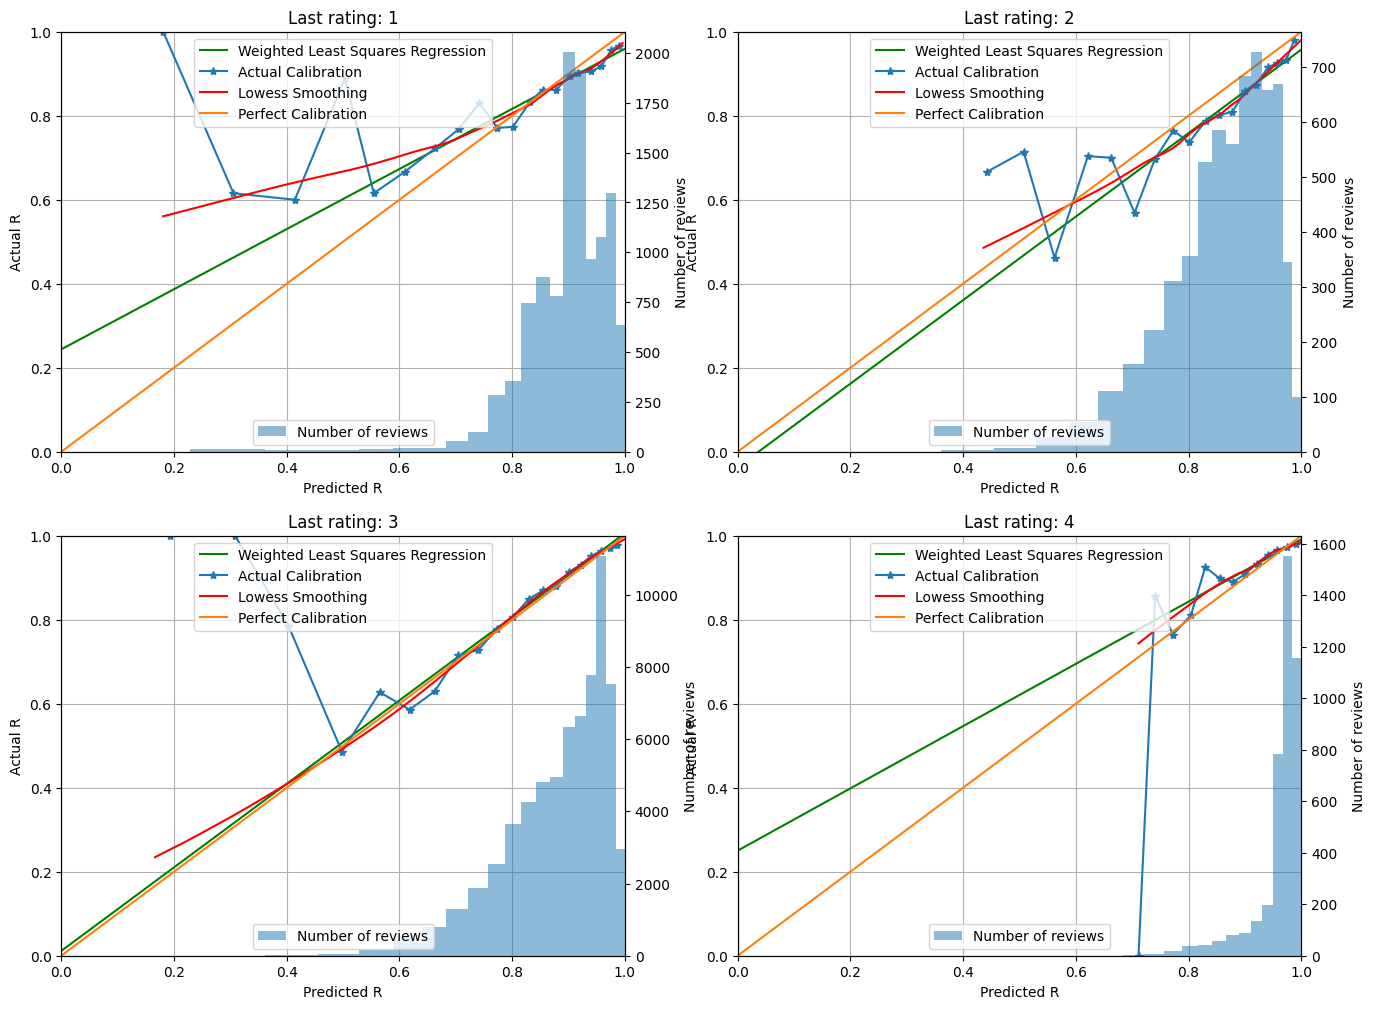

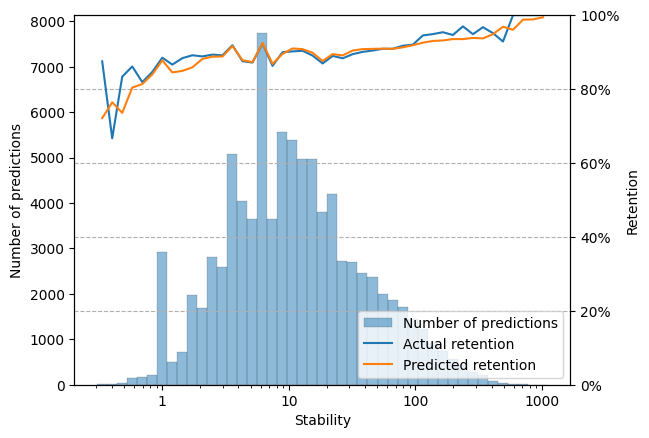

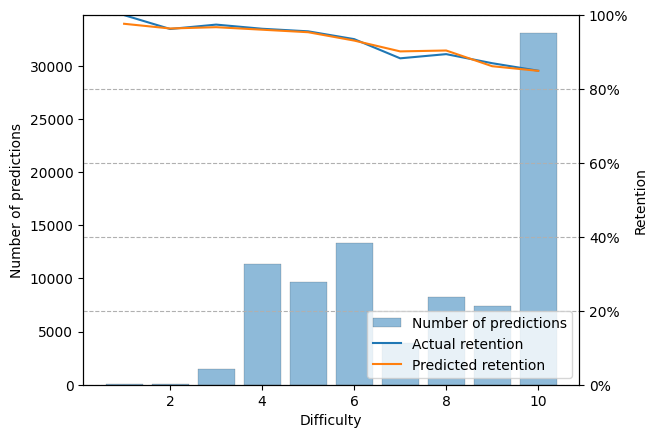

In [8]:
from fsrs_optimizer import Collection, power_forgetting_curve
from sklearn.metrics import log_loss

my_collection = Collection(w1)
stabilities, difficulties = my_collection.batch_predict(df1)
df1["stability"] = stabilities
df1["difficulty"] = difficulties
df1["p"] = power_forgetting_curve(df1["delta_t"], df1["stability"])

my_collection = Collection(w2)
stabilities, difficulties = my_collection.batch_predict(df2)
df2["stability"] = stabilities
df2["difficulty"] = difficulties
df2["p"] = power_forgetting_curve(df2["delta_t"], df2["stability"])

df_join = pd.concat([df1, df2])
print(f"log loss: {log_loss(df_join['y'], df_join['p']):.4f}")
optimizer.calibration_graph(df_join)

log loss: 0.3018
RMSE(bins): 0.0219
R-squared: 0.9745
MAE: 0.0062
ICI: 0.0044
E50: 0.0049
E90: 0.0058
EMax: 0.1397
[0.00681485 0.9954031 ]

Last rating: 1
RMSE(bins): 0.0357
R-squared: 0.6431
MAE: 0.0192
ICI: 0.0160
E50: 0.0125
E90: 0.0261
EMax: 0.3813
[0.27040763 0.68872012]

Last rating: 2
RMSE(bins): 0.0620
R-squared: 0.6863
MAE: 0.0411
ICI: 0.0389
E50: 0.0409
E90: 0.0460
EMax: 0.0584
[-0.01945387  0.97754866]

Last rating: 3
RMSE(bins): 0.0269
R-squared: 0.9596
MAE: 0.0117
ICI: 0.0095
E50: 0.0112
E90: 0.0135
EMax: 0.0655
[-0.01818683  1.0301812 ]

Last rating: 4
RMSE(bins): 0.0372
R-squared: 0.5960
MAE: 0.0092
ICI: 0.0084
E50: 0.0103
E90: 0.0151
EMax: 0.0282
[0.2332406  0.75883562]


({'R-squared': 0.9744994164638632,
  'MAE': 0.006201518363036692,
  'ICI': 0.004373185714447711,
  'rmse': 0.021918271119592193},
 (<Figure size 640x480 with 2 Axes>,
  <Figure size 1600x1200 with 8 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>))

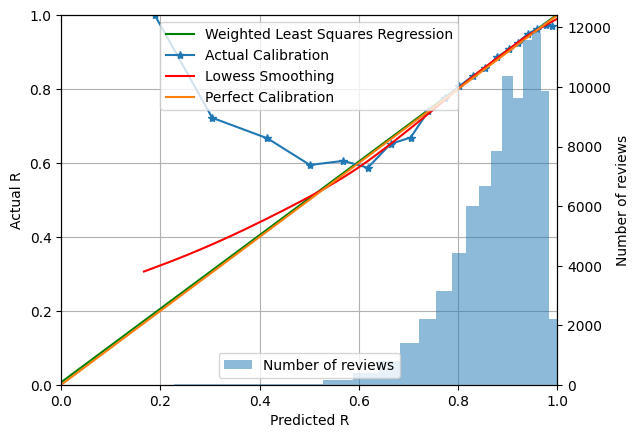

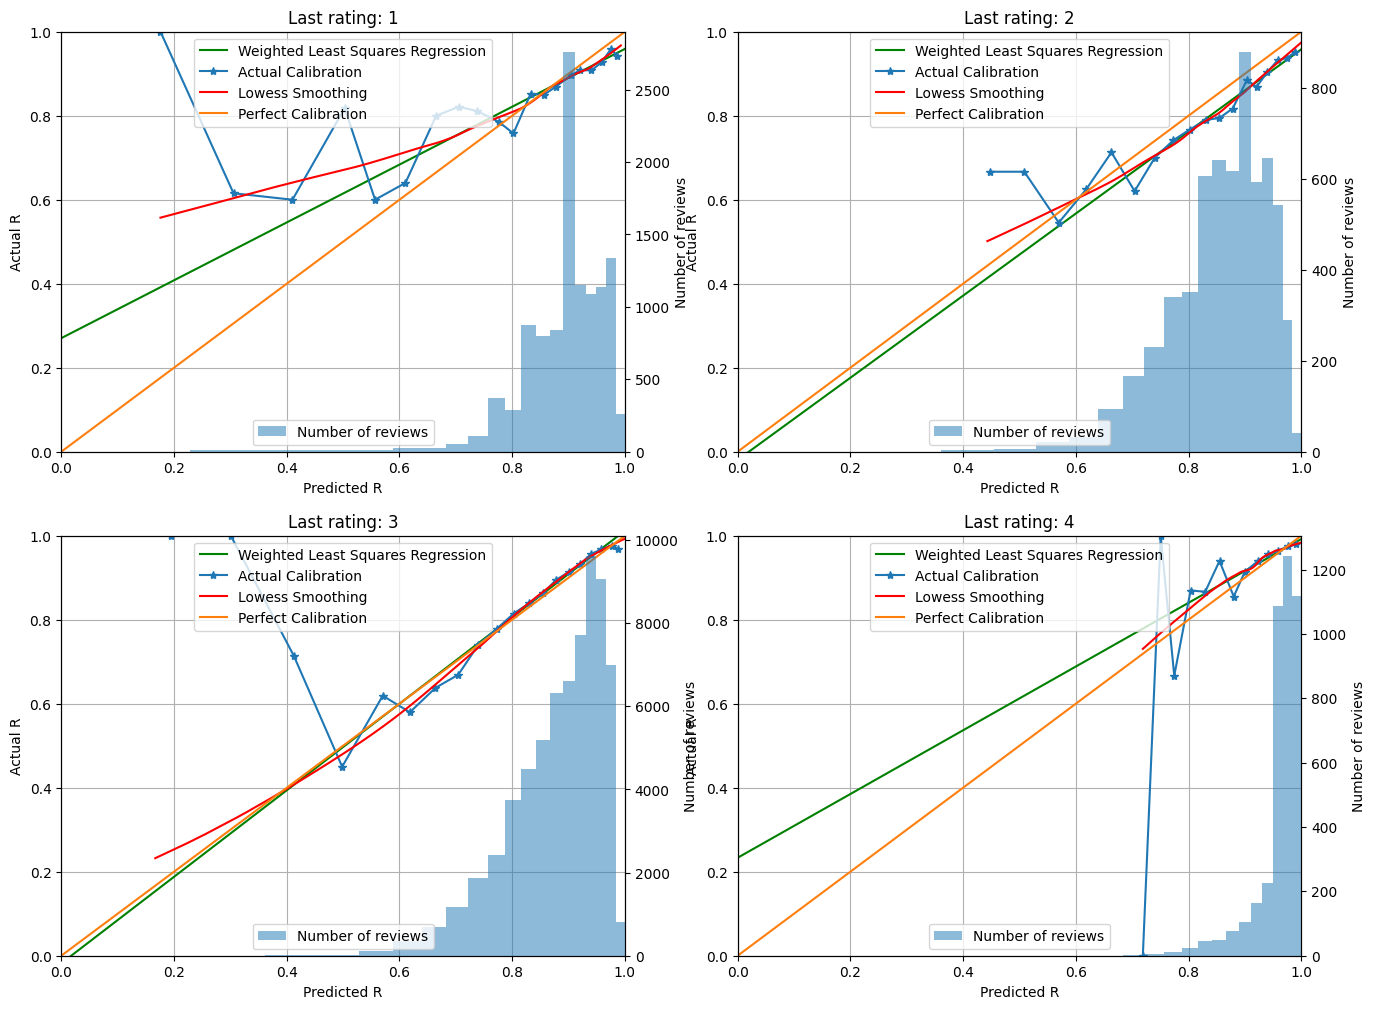

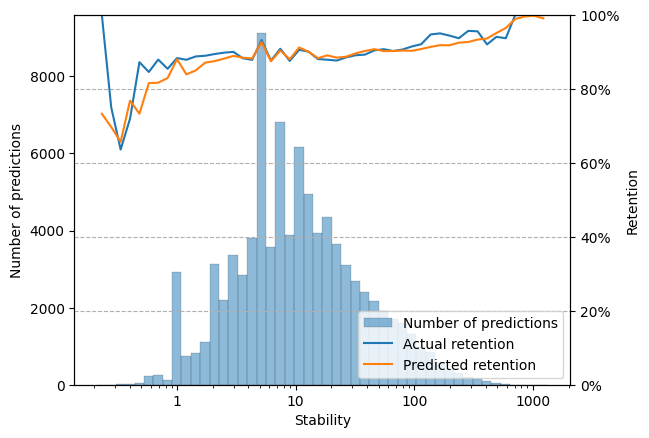

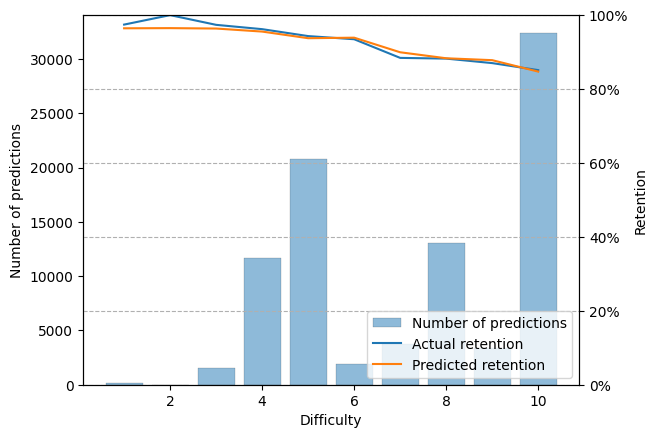

In [9]:
my_collection = Collection(w3)
stabilities, difficulties = my_collection.batch_predict(df3)
df3["stability"] = stabilities
df3["difficulty"] = difficulties
df3["p"] = power_forgetting_curve(df3["delta_t"], df3["stability"])
print(f"log loss: {log_loss(df3['y'], df3['p']):.4f}")
optimizer.calibration_graph(df3)